In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv(r'C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day42-outlier-removal-using-zscore\placement.csv')

In [35]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df['cgpa'].skew()
##Non-skewed

-0.014529938929314918

In [9]:
df['placement_exam_marks'].skew()
##Right skew So we will use box plot for outlier detection

0.8356419499466834

<AxesSubplot: >

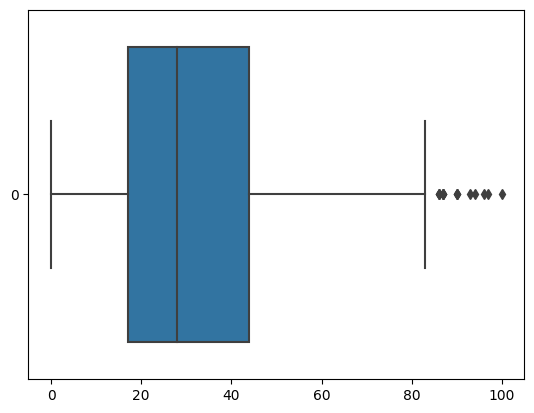

In [13]:
sns.boxplot(df.placement_exam_marks,orient='h')

In [18]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)

In [19]:
IQR=Q3-Q1
IQR

27.0

In [22]:
lower_limit=Q1-IQR*1.5
upper_limit=Q3+IQR*1.5

In [25]:
#Trimmming 
new_df_trim=df[(df.placement_exam_marks>lower_limit)&(df.placement_exam_marks<upper_limit)]
new_df_trim.shape

(985, 3)

<AxesSubplot: >

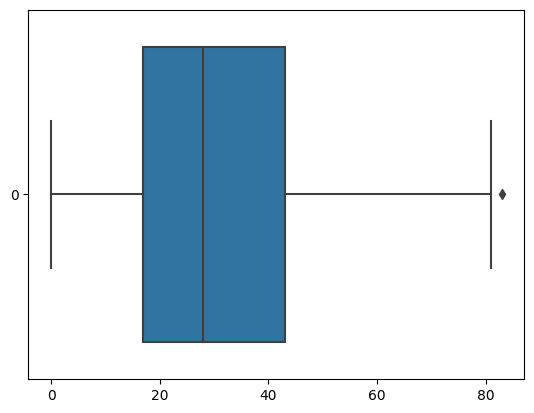

In [26]:
sns.boxplot(new_df_trim.placement_exam_marks,orient='h')

In [27]:
#Capping
new_df_cap=df.copy()

new_df_cap['placement_exam_marks']=np.where(new_df_cap['placement_exam_marks']>upper_limit,upper_limit,np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks']))


In [29]:
new_df_cap.shape

(1000, 3)

In [31]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64